In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# for feature selection
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# for regression
import statsmodels.api as sm
from scipy import stats

In [4]:
# Read and merge datasets on leisure and work
updated_main = pd.read_csv('main_demo.csv')

#### Any interesting correlations between Leisure Index and personality/emotions?

Leisure Index (how much time a person spends on leisure activities relatively to other people) seems to be highly correlated particularly with certain personality traits:

- intellect/openness to experience (0.57) - this makes sense because people who are high in openness to experience tend to be curious, openminded, imaginative, more willing to try new things - it would make sense that such people would have more hobbies and enjoy their free time more

- emotional stability/neuroticism (0.47) - this also makes sense but we can't rule out that emotionally stable people can also more enjoy working

No interesting correlations between leisure index and emotions (emotion detection not perfect - in some cases falsely identified sadness).

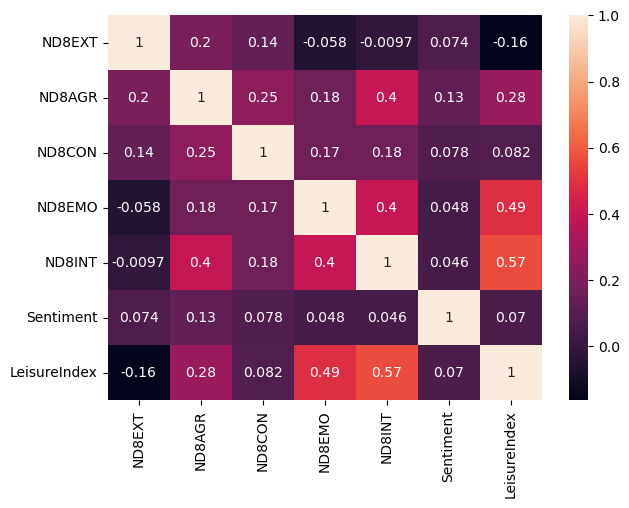

In [5]:
# Relationship between personality, leisure and sentiment
coll = ['ND8EXT', 'ND8AGR', 'ND8CON', 'ND8EMO', 'ND8INT','Sentiment','LeisureIndex']

b_corr = updated_main[coll].corr()

# Visualize correlations between variables

# Set the figure size
fig, ax = plt.subplots(figsize=(7, 5))

# Create the heatmap using seaborn
sn.heatmap(b_corr, ax=ax, annot=True)
plt.show()

#### Leisure Index and wellbeing

Most wellbeing variables seem to be correlated with the Leisure Index - people with higher wellbeing scores seem to spend more time on hobbiest (but the same could be true for work)

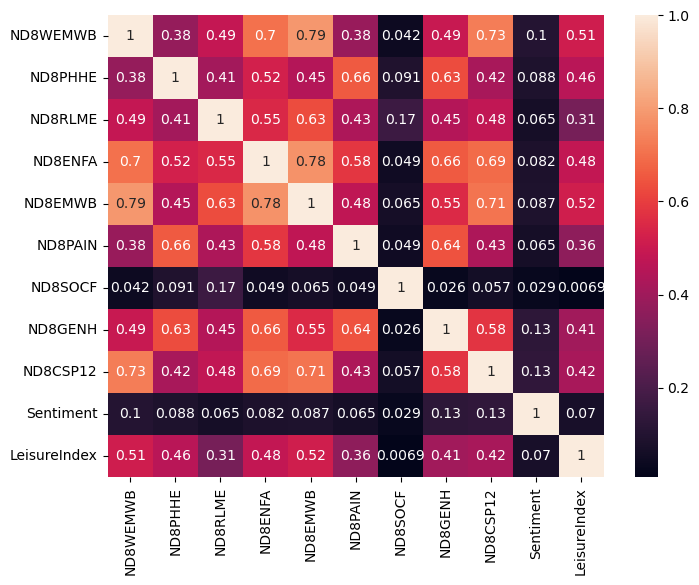

In [6]:
# Relationship between sentiment, emotions and wellbeing
col = ['ND8WEMWB','ND8PHHE','ND8RLME','ND8ENFA','ND8EMWB','ND8PAIN','ND8SOCF',
       'ND8GENH','ND8CSP12','Sentiment','LeisureIndex']

wellb_corr = updated_main[col].corr()

# Visualize correlations between variables

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Create the heatmap using seaborn
sn.heatmap(wellb_corr, ax=ax, annot=True)
plt.show()

### Most important predictors of Leisure Index (leisure engagement)

- openness to experience
- extroversion
- emotional stability
- mental wellbeing
- energy levels

Literature (e. g. for meta-analysis: https://psycnet.apa.org/fulltext/2015-01003-001.pdf) supports the link between subjective well-being and leisure engagement, however, causality probably goes in the opposite direction (leisure engagement -> subjective wellbeing).

There is also some support for the link between openness to experience and leisure interest and engagement (high openness -> interest in a wider range of leisure activities, more times spent on leisure activities). 

Another study mentions also that lower neuroticism and higher Extraversion were moderately associated with stronger engagement in all types of activities (https://psycnet.apa.org/fulltext/2023-61649-001.pdf).

In [7]:
# Set up and run the regression
X = updated_main[['ND8EXT', 'ND8AGR', 'ND8CON', 'ND8EMO', 'ND8INT',
                  'Sentiment','ND8WEMWB','ND8PHHE', 'ND8RLME','ND8ENFA', 
                  'ND8EMWB', 'ND8PAIN', 'ND8SOCF','ND8GENH', 'ND8CSP12',
                  'Sentiment Continuous', 'anger', 'disgust', 'fear','joy', 
                  'neutral', 'sadness', 'surprise']].values
Y = updated_main['LeisureIndex'].values
Y = Y.reshape(-1, 1)

# Impute missing values
# Create an instance of the SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in your input data
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Fit the model using statsmodel 
X2 = sm.add_constant(X_imputed)
est = sm.OLS(Y_imputed, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     622.0
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:03:43   Log-Likelihood:                -8969.7
No. Observations:               14752   AIC:                         1.799e+04
Df Residuals:                   14728   BIC:                         1.817e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.492e+04   6.36e+04     -0.235      0.8

In [8]:
# Fit Lasso model and set the alpha parameter (the larger alpha the sparser model)
lasso0 = linear_model.Lasso(alpha=0.35).fit(X_imputed, Y_imputed)
lasso0.coef_

array([-0.00263687,  0.        , -0.        ,  0.0011418 ,  0.03366502,
        0.        ,  0.        ,  0.00748677, -0.        ,  0.00312082,
        0.00892009,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ])

In [9]:
# Try out feature selection
X_new = SelectKBest(f_classif, k=5).fit_transform(X_imputed, Y_imputed)
print(X_new)

[[26. 37. 58. 80. 88.]
 [23. 32. 40. 20. 28.]
 [30. 32. 59. 70. 88.]
 ...
 [35. 39. 56. 75. 92.]
 [35. 39. 56. 75. 92.]
 [35. 39. 56. 75. 92.]]


/Users/ninabucekova/miniconda3/envs/nlpenv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
updated_main[['ND8EXT', 'ND8AGR', 'ND8CON', 'ND8EMO', 'ND8INT','ND8WEMWB', 
                 'ND8PHHE', 'ND8RLME','ND8ENFA', 'ND8EMWB', 'ND8PAIN', 'ND8SOCF',
                 'ND8GENH', 'ND8CSP12','N8SCQ16C','N8SCQ20C']].head()